# MINI PROJECT 01

This dataset contains information on the insurance claim. each observation is different policyholder with various features like the age of the person, the gender of the policyholder, body mass index, providing an understanding of the body, number of children of the policyholder, smoking state of the policyholder and individual medical costs billed by health insurance.

Feature Description:---
age :age of policyholder
sex :male(1)/female(0)
bmi: body mass index(kg / m2)
children: number of children/dependents of policyholder
smoker : smoking state nonsmoker(0)/smoker(1)
region : residential area northeast(0)/northwest(1)/southeast(2)/southwest(3)
charges:  medical cost
insuranceclaim : yes(1)/no(0)

Using Proper model try to predict the insurance claim.

In [95]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statistics

In [96]:
# data loading
df = pd.read_csv('insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,0,1,3,16884.92400,1
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
4,32,1,28.880,0,0,1,3866.85520,1


In [97]:
# shape
df.shape

(1338, 8)

In [98]:
# size
df.size

10704

In [99]:
# info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             1338 non-null   int64  
 1   sex             1338 non-null   int64  
 2   bmi             1338 non-null   float64
 3   children        1338 non-null   int64  
 4   smoker          1338 non-null   int64  
 5   region          1338 non-null   int64  
 6   charges         1338 non-null   float64
 7   insuranceclaim  1338 non-null   int64  
dtypes: float64(2), int64(6)
memory usage: 83.8 KB


In [100]:
# columns
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges',
       'insuranceclaim'],
      dtype='object')

In [101]:
# describe
df.describe()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,0.505232,30.663397,1.094918,0.204783,1.515695,13270.422265,0.585202
std,14.049960,0.500160,6.098187,1.205493,0.403694,1.104885,12110.011237,0.492871
min,18.000000,0.000000,15.960000,0.000000,0.000000,0.000000,1121.873900,0.000000
25%,27.000000,0.000000,26.296250,0.000000,0.000000,1.000000,4740.287150,0.000000
50%,39.000000,1.000000,30.400000,1.000000,0.000000,2.000000,9382.033000,1.000000
75%,51.000000,1.000000,34.693750,2.000000,0.000000,2.000000,16639.912515,1.000000
max,64.000000,1.000000,53.130000,5.000000,1.000000,3.000000,63770.428010,1.000000


In [102]:
# check for missing / null values
df.isnull().sum()

age               0
sex               0
bmi               0
children          0
smoker            0
region            0
charges           0
insuranceclaim    0
dtype: int64

In [103]:
df.duplicated().sum()

1

In [104]:
df=df.drop_duplicates()

In [105]:
df.nunique()

age                 47
sex                  2
bmi                548
children             6
smoker               2
region               4
charges           1337
insuranceclaim       2
dtype: int64

In [106]:
# We drop 'sex' because The insurance claim is not depend on sex.

df.drop(['sex'],axis=1,inplace=True)

In [107]:
df.head()

,age,bmi,children,smoker,region,charges,insuranceclaim
0,19,27.900,0,1,3,16884.92400,1
1,18,33.770,1,0,2,1725.55230,1
2,28,33.000,3,0,2,4449.46200,0
3,33,22.705,0,0,1,21984.47061,0
4,32,28.880,0,0,1,3866.85520,1


In [108]:
df.shape

(1337, 7)

In [109]:
df.describe()

,age,bmi,children,smoker,region,charges,insuranceclaim
count,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000
mean,39.222139,30.663452,1.095737,0.204936,1.516081,13279.121487,0.584892
std,14.044333,6.100468,1.205571,0.403806,1.105208,12110.359656,0.492925
min,18.000000,15.960000,0.000000,0.000000,0.000000,1121.873900,0.000000
25%,27.000000,26.290000,0.000000,0.000000,1.000000,4746.344000,0.000000
50%,39.000000,30.400000,1.000000,0.000000,2.000000,9386.161300,1.000000
75%,51.000000,34.700000,2.000000,0.000000,2.000000,16657.717450,1.000000
max,64.000000,53.130000,5.000000,1.000000,3.000000,63770.428010,1.000000


In [110]:
df.corr()

,age,bmi,children,smoker,region,charges,insuranceclaim
age,1.000000,0.109344,0.041536,-0.025587,0.001626,0.298308,0.114748
bmi,0.109344,1.000000,0.012755,0.003746,0.157574,0.198401,0.384307
children,0.041536,0.012755,1.000000,0.007331,0.016258,0.067389,-0.409189
smoker,-0.025587,0.003746,0.007331,1.000000,-0.002358,0.787234,0.333701
region,0.001626,0.157574,0.016258,-0.002358,1.000000,-0.006547,0.021193
charges,0.298308,0.198401,0.067389,0.787234,-0.006547,1.000000,0.310213
insuranceclaim,0.114748,0.384307,-0.409189,0.333701,0.021193,0.310213,1.000000


In [111]:
# Visualising the Data

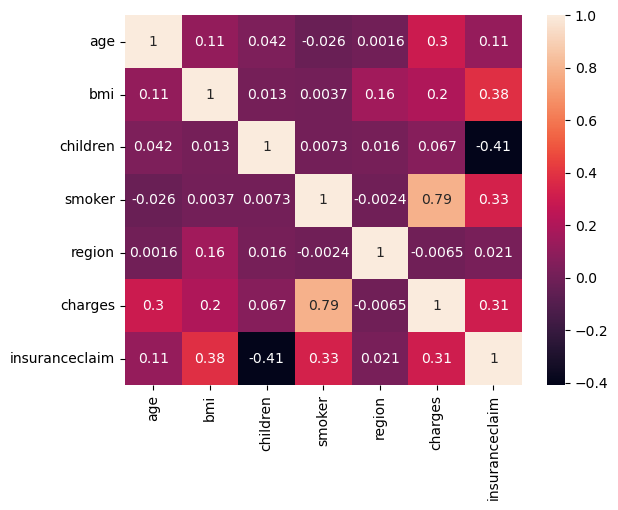

In [112]:
sns.heatmap(df.corr(),annot=True)
plt.show()

C:\Users\Prabhat\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


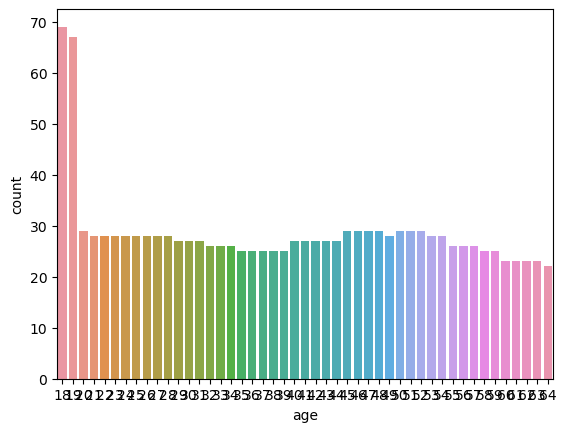

In [113]:
sns.countplot(df['age'])
plt.show()

#Summary:- Most of insurance claiming person age i.e. 60-70 years

C:\Users\Prabhat\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


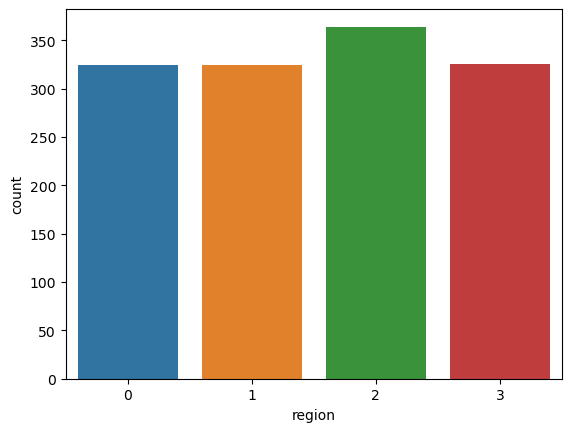

In [114]:
sns.countplot(df['region'])
plt.show()

#Summary:-  most of insuranceclaim is taken from southeast

C:\Users\Prabhat\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


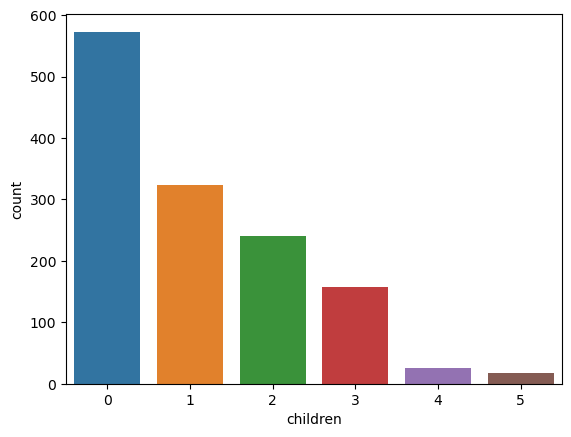

In [115]:
sns.countplot(df['children'])
plt.show()

#Summary:- Most of insurance claiming person has no child.

C:\Users\Prabhat\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


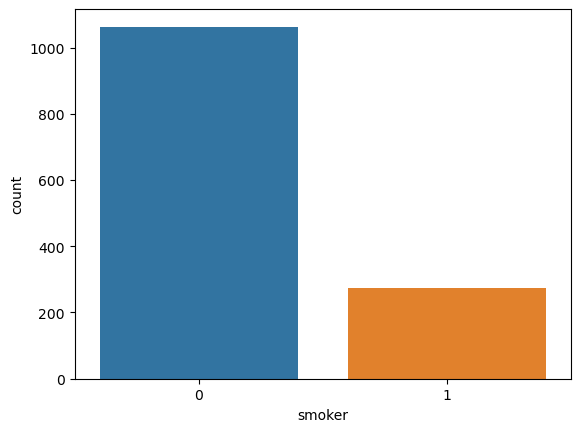

In [116]:
sns.countplot(df['smoker'])
plt.show()

#Summary:- Most of insurance claiming person is non-smoker

C:\Users\Prabhat\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


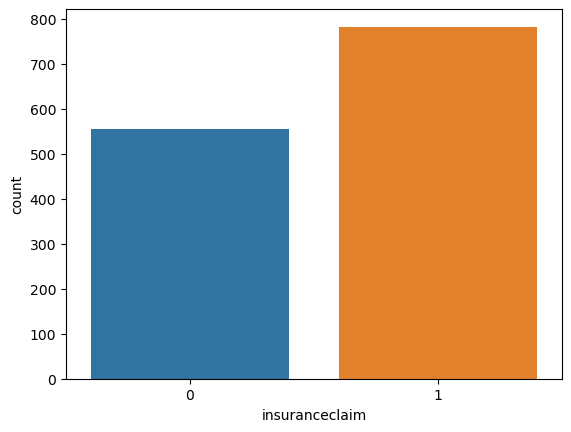

In [117]:
sns.countplot(df['insuranceclaim'])
plt.show()

#Summary :- Most of insurance claiming person has claimed the insurance

In [118]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1337 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             1337 non-null   int64  
 1   bmi             1337 non-null   float64
 2   children        1337 non-null   int64  
 3   smoker          1337 non-null   int64  
 4   region          1337 non-null   int64  
 5   charges         1337 non-null   float64
 6   insuranceclaim  1337 non-null   int64  
dtypes: float64(2), int64(5)
memory usage: 83.6 KB


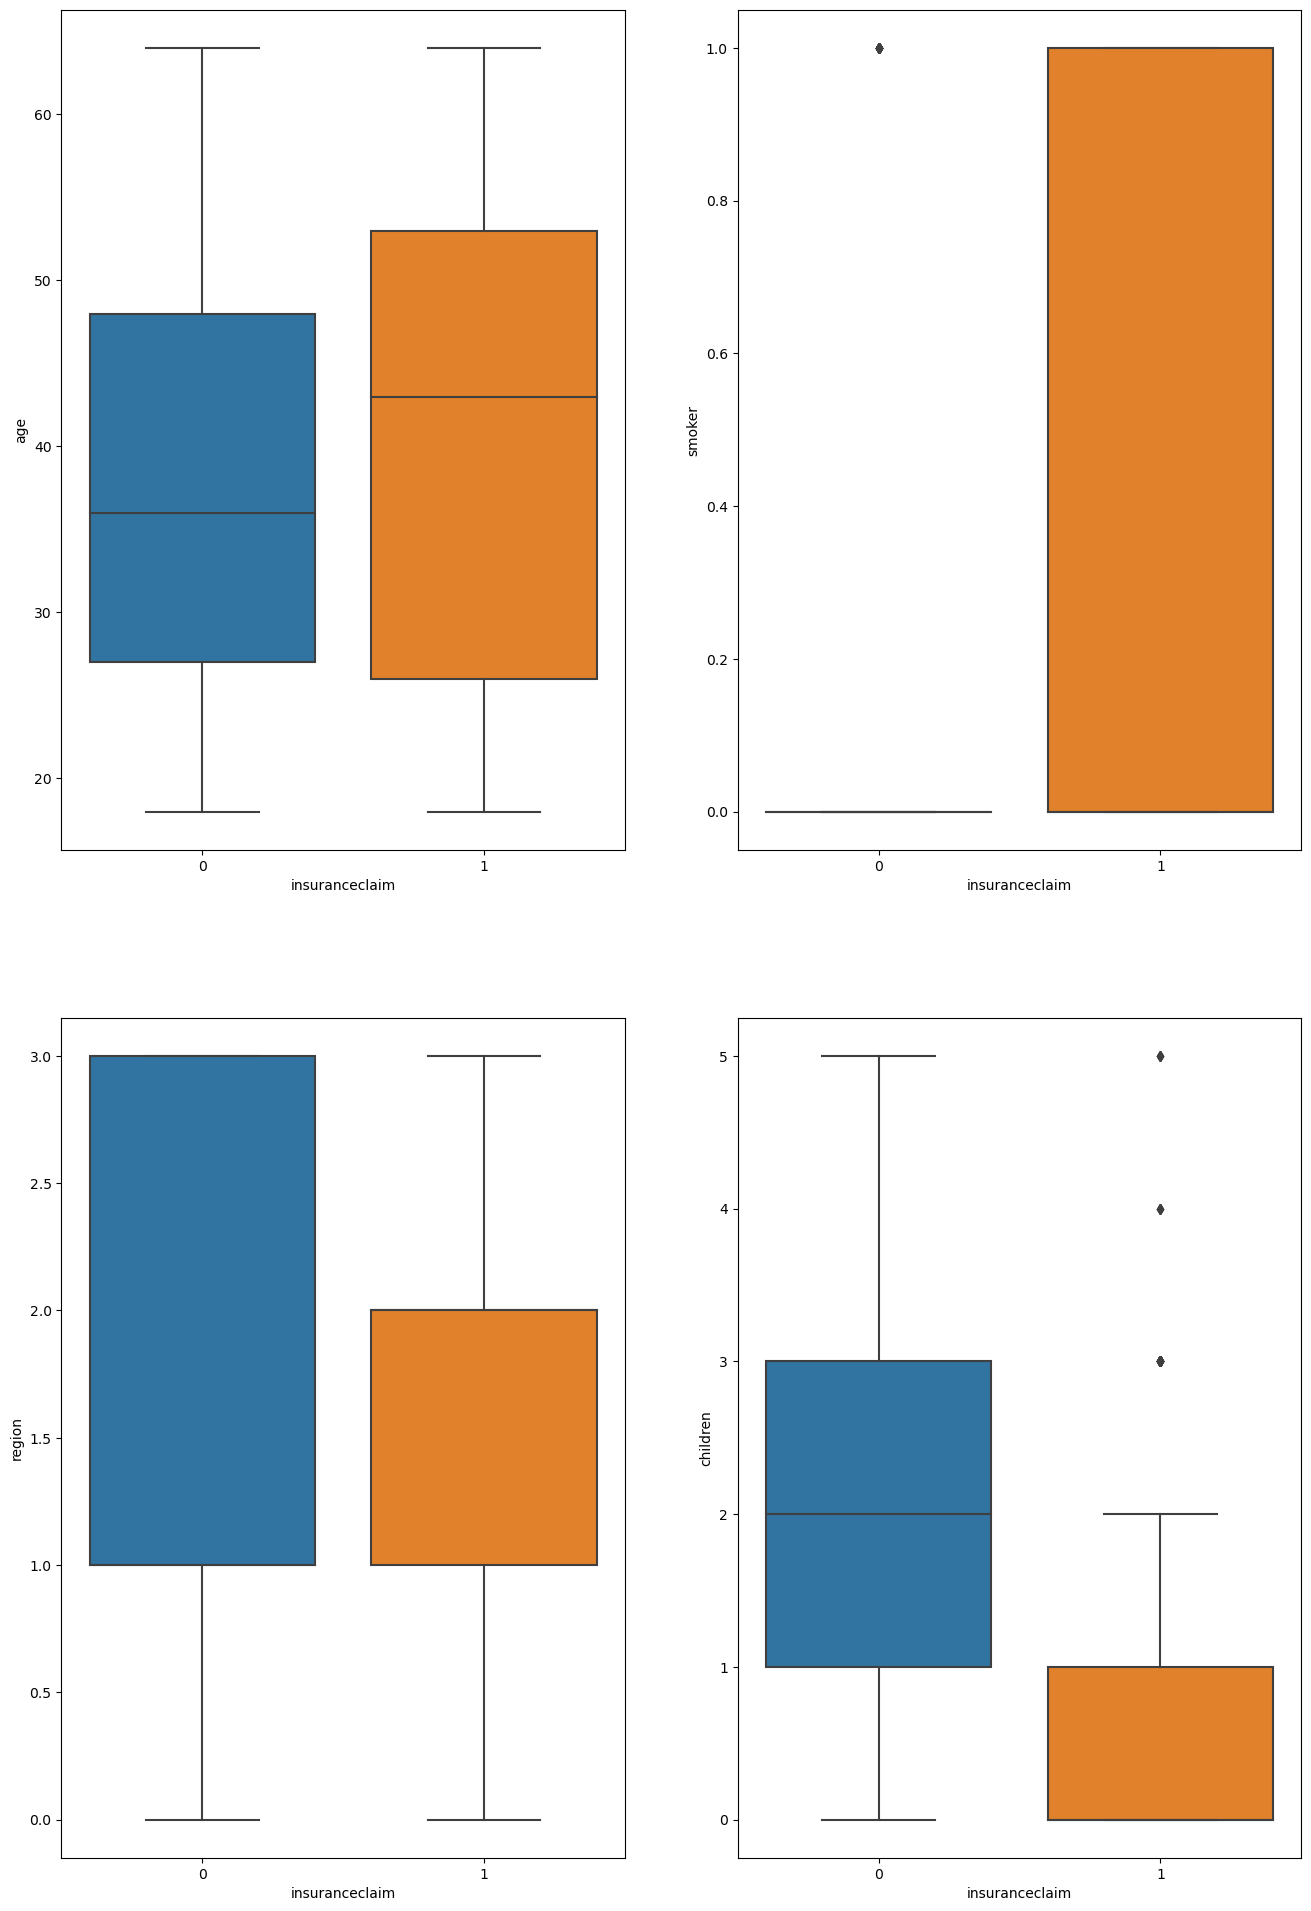

In [119]:
plt.figure(figsize=(16, 24))
plt.subplot(2,2,1)
sns.boxplot(y='age',x='insuranceclaim',data=df)
plt.subplot(2,2,2)
sns.boxplot(y='smoker',x='insuranceclaim',data=df)
plt.subplot(2,2,3)
sns.boxplot(y='region',x='insuranceclaim',data=df)
plt.subplot(2,2,4)
sns.boxplot(y='children',x='insuranceclaim',data=df)
plt.show()

In [120]:
df= df.drop(index=df[(df['children']>2)].index)

In [121]:
df.shape

(1137, 7)

# Data Preparation

In [122]:
df.head()

,age,bmi,children,smoker,region,charges,insuranceclaim
0,19,27.900,0,1,3,16884.92400,1
1,18,33.770,1,0,2,1725.55230,1
3,33,22.705,0,0,1,21984.47061,0
4,32,28.880,0,0,1,3866.85520,1
5,31,25.740,0,0,2,3756.62160,0


In [123]:
df.nunique()

age                 47
bmi                508
children             3
smoker               2
region               4
charges           1137
insuranceclaim       2
dtype: int64

# Splitting the data into train and test

In [124]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [125]:
# Separate the features and target variable

x = df.drop("insuranceclaim", axis=1)
y = df["insuranceclaim"]

In [126]:
x_train,x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [127]:
x_train.shape

(909, 6)

In [128]:
x_train.columns

Index(['age', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [129]:
x_train.head()

,age,bmi,children,smoker,region,charges
14,27,42.13,0,1,2,39611.7577
791,19,27.60,0,0,3,1252.4070
669,40,29.81,1,0,2,6500.2359
1263,43,29.90,1,0,3,7337.7480
375,23,28.31,0,1,1,18033.9679


In [130]:
x_test.shape

(228, 6)

In [131]:
# Fit the model to the training data
model.fit(x_train, y_train)

C:\Users\Prabhat\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [132]:
# Make predictions on the testing data

y_pred = model.predict(x_test)

# Testing

In [133]:
from sklearn.metrics import confusion_matrix 

In [134]:
confusion_matrix(y_test, y_pred)

array([[ 43,  20],
       [ 17, 148]], dtype=int64)

In [135]:
pd.DataFrame(confusion_matrix(y_test, y_pred), columns=['Predicted No', 'Predicted Yes'], index =['Actual No', 'Actual Yes'])

,Predicted No,Predicted Yes
Actual No,43,20
Actual Yes,17,148


By this 2x2 matrix, we clearly identifies our prediction.

In the 'Predicted No' column, there are 43 peoples who actually not claiming and our model also predicted that they are not claiming insurance. whereas, 17 peoples who actually claimed insurance but our model predict that they don't claim.

In 'Predicted Yes' column, there are 148 peoples who actually claiming insurance and model also predict that they claimed. whereas, 20 peoples who actually not claiming insurance but model predicts that they claimed

In [136]:
from sklearn.metrics import classification_report

In [137]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.72      0.68      0.70        63
           1       0.88      0.90      0.89       165

    accuracy                           0.84       228
   macro avg       0.80      0.79      0.79       228
weighted avg       0.84      0.84      0.84       228



In [138]:
# Calculate the accuracy score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8377192982456141


The accuracy is 0.83, meaning that the model correctly predicted 83% of the instances.